# Geologie

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Workflow:
* Datensatz in **1-7_Vegetation** erzeugt
* in **QGIS**
    * mit **PointSamplingTool** Daten von **[Harmonized World Soil Database](http://webarchive.iiasa.ac.at/Research/LUC/External-World-soil-database/HTML/HWSD_Data.html?sb=4)**-Datensatz abgenommen

In [2]:
df = pd.read_csv('../data/processed/1-5_Geologie_FdSt-DS_Koord_GEOL_GLG.csv')
display(df.head())

,X,Y,ort_name,ort_kurz,x_long,y_lat,GLG
0,17.580406,-0.704069,Gombe,GMB,17.580406,-0.704069,H2O
1,17.432057,-0.006791,Bojenjo,BJJ,17.432057,-0.006791,Qe
2,17.478148,0.099491,Bokuma,BKA,17.478148,0.099491,Qe
3,17.221926,-0.805556,Boleko,BLK,17.221926,-0.805556,Qe
4,17.365479,-0.552494,Botwale,BTW,17.365479,-0.552494,Qe


In [3]:
df_pivot = df.pivot_table(values = 'ort_name', index = 'GLG', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['ort_name']/df_pivot['ort_name'].sum()*100
df_pivot = df_pivot.sort_index(by=['Prozent'], ascending=[True])
df_pivot

,ort_name,Prozent
GLG,,
QT,2,1.626016
H2O,9,7.317073
pCm,24,19.512195
Qe,88,71.544715


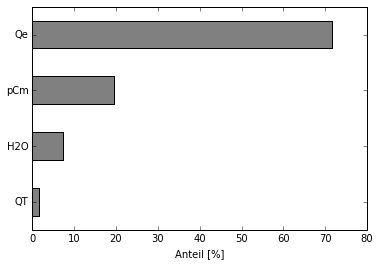

In [4]:
df_pivot['Prozent'].plot(kind = 'barh', color = 'grey')
plt.xlabel('Anteil [%]')
plt.ylabel('')
plt.show()